<a href="https://colab.research.google.com/github/Pritamyadav-14/preetamyadav-task1/blob/main/TASK_2_Project_1_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

df = pd.read_csv('/content/Sample - Superstore.csv')  # Update file name if needed
print(df.head())
print(df.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [10]:
df = df.drop_duplicates()

In [11]:
df = df.fillna(df.mean(numeric_only=True))

In [12]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 * IQR)]

In [14]:
print(df.describe())
print(df.corr(numeric_only=True))

            Row ID   Postal Code        Sales     Quantity     Discount  \
count  8827.000000   8827.000000  8827.000000  8827.000000  8827.000000   
mean   5016.375892  55373.635663    92.864853     3.608587     0.157606   
std    2888.406540  31974.536840   114.045078     2.129308     0.211531   
min       1.000000   1040.000000     0.444000     1.000000     0.000000   
25%    2508.500000  23320.000000    15.008000     2.000000     0.000000   
50%    5028.000000  59801.000000    40.880000     3.000000     0.200000   
75%    7517.500000  90008.000000   124.225000     5.000000     0.200000   
max    9994.000000  99301.000000   498.260000    14.000000     0.800000   

            Profit  
count  8827.000000  
mean     11.198644  
std      49.066101  
min   -1181.282400  
25%       1.702400  
50%       7.437600  
75%      21.335400  
max     240.859500  
               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.013844  0.011378  0.002813  0.01

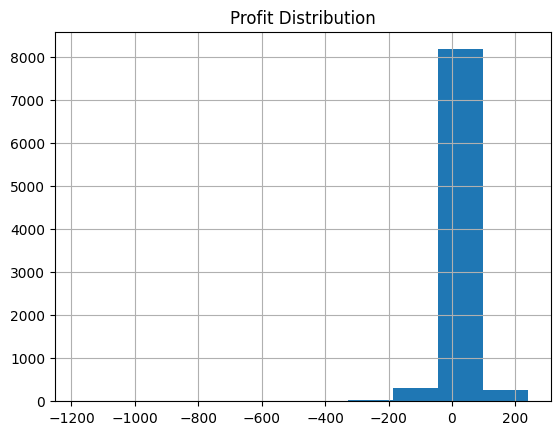

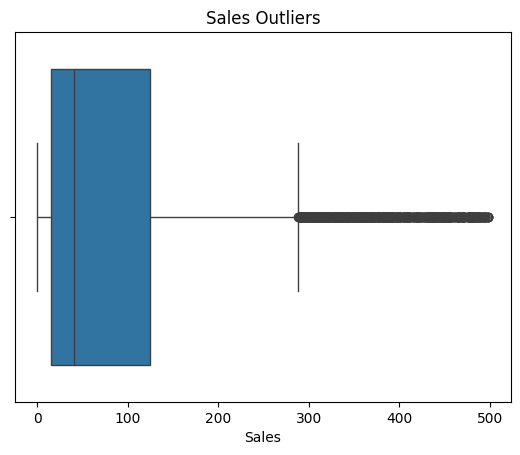

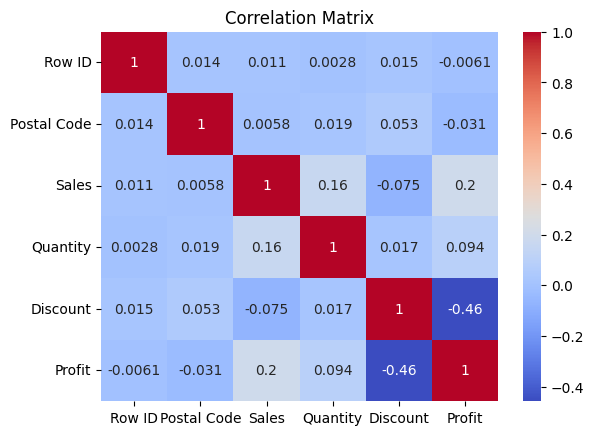

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
df['Profit'].hist()
plt.title("Profit Distribution")
plt.show()

# Boxplot
sns.boxplot(x=df['Sales'])
plt.title("Sales Outliers")
plt.show()

# Heatmap
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()